2025-08-25 07:50:40.423081: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-25 07:50:40.426557: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-25 07:50:40.786519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-25 07:50:42.438485: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

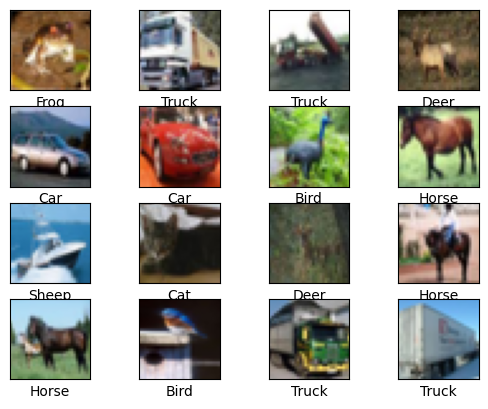

/home/dosedaf/py/img-classifier/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1756083048.638500   11914 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1756083048.694826   11914 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3537 - loss: 1.7498 - val_accuracy: 0.4520 - val_loss: 1.4879
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5002 - loss: 1.3934 - val_accuracy: 0.5138 - val_loss: 1.3488
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5568 - loss: 1.2421 - val_accuracy: 0.5540 - val_loss: 1.2570
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5979 - loss: 1.1376 - val_accuracy: 0.6000 - val_loss: 1.1242
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6296 - loss: 1.0565 - val_accuracy: 0.6137 - val_loss: 1.1008
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6547 - loss: 0.9795 - val_accuracy: 0.6327 - val_loss: 1.0546
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6799 - loss: 0.9149 - val_accuracy: 0.6258 - val_loss: 1.0645
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6990 - loss: 0.8578 - val_accu

In [2]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()
training_images, testing_images = training_images/255, testing_images/255 # misal 200, jadi 200/255 = 0,784, kenapa 255? ada 0

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Sheep', 'Truck']

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

training_images = training_images[:20000]
training_labels = training_labels[:20000]

testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

resize_and_rescale = tf.keras.Sequential([
])

model = tf.keras.models.Sequential([
    # tf.keras.layers.Rescaling(1./255),
    # tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    # tf.keras.layers.RandomRotation(0.2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

model.save('img_classifier.keras')